<a href="https://colab.research.google.com/github/star1sh/AI_seocho/blob/main/%EC%84%9C%EC%B4%88AI_230617.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2023년 6월 17일 서초 AI 칼리지 심화과정 오프라인**

오늘은 이번 주차에 배웠던 개념들을 짚고 넘어간 뒤, 문제 해결력을 키워주는 크고 작은 문제들을 함께 풀어보면서 배운 내용에 익숙해지는 시간을 가질 예정입니다.

0.   개념 복기
1.   Open API(네이버 API)를 활용한 데이터 수집
2.   Beautiful Soup과 Selenium을 활용한 정적/동적 웹 크롤링
3.   YouTube의 영상 및 음성 데이터 수집
4.   Pandas를 활용한 데이터 전처리
5.   데이터 시각화


# **1교시 - 네이버 API 실습**

**네이버** API - 파파고 NMT
https://developers.naver.com/docs/papago/papago-nmt-example-code.md#python

개발자센터에서 Client ID와 Secret 값을 받아오세요
https://developers.naver.com/apps/#/myapps/Qyp8hwZWflnxOTa7hzqA/overview

언어 감지는 입력된 텍스트의 언어를 감지해 주는 RESTful API입니다. 언어 감지는 다음의 18개 언어를 감지해 언어 코드를 반환합니다.

한국어(ko)
일본어(ja)
중국어 간체(zh-CN)
중국어 번체(zh-TW)
힌디어(hi)
영어(en)
스페인어(es)
프랑스어(fr)
독일어(de)
포르투갈어(pt)
베트남어(vi)
인도네시아어(id)
페르시아어(fa)
아랍어(ar)
미얀마어(mm)
태국어(th)
러시아어(ru)
이탈리아어(it)
언어 감지의 하루 API 처리 한도는 2,000,000자입니다.

In [ ]:
import os
import sys
import urllib.request
client_id = "Qyp8hwZWflnxOTa7hzqA" # 개발자센터에서 발급받은 Client ID 값
client_secret = "D06cbMtH6P" # 개발자센터에서 발급받은 Client Secret 값

#### 한국어 to 영어 ####
encText = urllib.parse.quote("반갑습니다") # 번역할 문장
data = "source=ko&target=en&text=" + encText # source=ko, target=en, text= 번역할 문장
url = "https://openapi.naver.com/v1/papago/n2mt"
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request, data=data.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{"message":{"result":{"srcLangType":"ko","tarLangType":"en","translatedText":"Nice to meet you.","engineType":"PRETRANS"},"@type":"response","@service":"naverservice.nmt.proxy","@version":"1.0.0"}}


In [ ]:
type(response_body)

bytes

In [ ]:
print(response_body)

b'{"message":{"result":{"srcLangType":"ko","tarLangType":"en","translatedText":"Nice to meet you.","engineType":"PRETRANS"},"@type":"response","@service":"naverservice.nmt.proxy","@version":"1.0.0"}}'


In [ ]:
#response_body["message"]

In [ ]:
import json

a = json.loads(response_body)

In [ ]:
print(a)

{'message': {'result': {'srcLangType': 'ko', 'tarLangType': 'en', 'translatedText': 'Nice to meet you.', 'engineType': 'PRETRANS'}, '@type': 'response', '@service': 'naverservice.nmt.proxy', '@version': '1.0.0'}}


In [ ]:
a['message']['result']['translatedText']

'Nice to meet you.'

In [ ]:
############################################################################
#### 문제 1. (종합: 제한시간 20분)
####
#### 문제 1-1. '오늘은 6월 17일입니다.'를 Papago 번역으로 한국어로부터 번역할 수 있는
#### 모든 목적 언어(target language) 문장으로 번역해서 translate라는
#### 변수명의 딕셔너리 자료구조에 담으세요. key값은 파파고에서 사용하는 국가코드
#### (예: "kr"), value값은 번역한 문장입니다.
####
#### 문제 1-2. 그 후, 딕셔너리를 국가코드의 알파벳순으로 정렬하여 sorted_translate라는
#### 변수명의 리스트 자료구조에 담으세요.
####
#### 문제 1-3. 그 후, sorted_translate를 통해 df라는 변수명의 Pandas Dataframe을
#### 제작하고 해당 Column명은 'Nation'과 'Sentence'로 지정하세요. 그 후 df를 출력하세요.
####
#### 문제 1-4. 그 후, df를 translation.xslx 파일명으로 현재 디렉토리에 저장하세요.
############################################################################


In [ ]:
############################################################################
#### 문제 2. (종합: 제한시간 30분)
####
#### 문제 2-1. 2022년 5월부터 2023년 4월까지 '월간단위'로 '가전'에 대하여
#### 20대 및 30대 여성의 검색 추이를 최대값을 100으로 했을 때 상대적인 키워드 트렌드를 조회하여
#### df_01 변수명의 Pandas Dataframe 자료구조에 저장하라.
####
#### 문제 2-2. 저장한 트렌드를 꺾은선 그래프로 그리라. 그래프의 제목은 'Trend of Home Appliances (가전)'으로
#### 설정하고, x축 라벨은 'month', y축 라벨은 'trend'로 설정하자.
####
#### 문제 2-3. Plot한 그림을 'fig.pdf'와 'fig.png' 로 현재 디렉토리에 저장하자.
############################################################################


# **2교시 - 웹 크롤링**

## **Beautiful Soup 사용하기**

## **Colab에서 Selenium 사용하기**


레퍼런스: https://colab.research.google.com/github/kaliiiiiiiiii/Selenium-Profiles/blob/master/google-colab/selenium_profiles.ipynb

In [ ]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium

# Install xvfb
apt install -y xvfb

# Install Selenium-Profiles
pip uninstall -y selenium_profiles
pip install --no-cache-dir selenium_profiles>=2.2.6

# pip install https://github.com/kaliiiiiiiiii/Selenium-Profiles/archive/refs/heads/dev.zip # dev-branch

# install python packages
pip install google-colab-shell
pip install webdriver-manager
pip install Pyvirtualdisplay

Executing: /tmp/apt-key-gpghome.UiXrHsbIjl/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.jcIEz47FfG/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.Msw3p4QPuI/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

In [ ]:
!pip install selenium
import selenium
# 설치된 selenium 라이브러리에 대한 정보(버전 등)를 조회한다.
help(selenium)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Help on package selenium:

NAME
    selenium

DESCRIPTION
    # Licensed to the Software Freedom Conservancy (SFC) under one
    # or more contributor license agreements.  See the NOTICE file
    # distributed with this work for additional information
    # regarding copyright ownership.  The SFC licenses this file
    # to you under the Apache License, Version 2.0 (the
    # "License"); you may not use this file except in compliance
    # with the License.  You may obtain a copy of the License at
    #
    #   http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing,
    # software distributed under the License is distributed on an
    # "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY
    # KIND, either express or implied.  See the License for the
    # specific language governing permissions and limitations
    # under the L

### Free Shell
Google Colab에서 Shell을 열 수 있는 방법!
리눅스의 명령어들을 알아두는 것을 추천한다.

ls - 현재 디렉토리에 있는 파일들의 정보를 보여준다.

cd - Change Directory

In [ ]:
from google_colab_shell import getshell
getshell()

### Start Actual Driver

In [ ]:
from selenium_profiles.webdriver import Chrome
from selenium_profiles.profiles import profiles
from selenium.webdriver.common.by import By  # locate elements
from selenium_profiles.utils.colab_utils import display, showscreen, show_html # virtual display

from webdriver_manager.chrome import ChromeDriverManager

chromedriver_path = ChromeDriverManager(version="90.0.4430.24").install()

profile = profiles.Windows() # or .Android
profile["cdp"]["cores"] = None # Chrome 90 doesn't allow emulating cores :(driver = mydriver.start(profile, uc_driver=False, executable_path=chromedriver_path)

mydriver = Chrome(profile, executable_path=chromedriver_path)

display = display()
display.start_display()

driver = mydriver.start()

### Screenshot

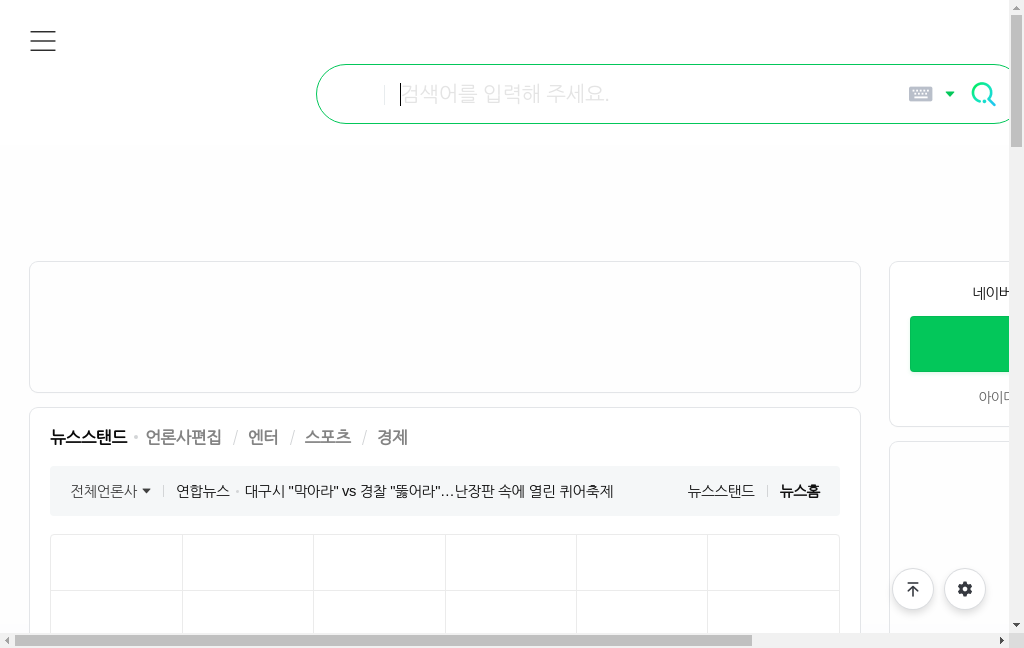


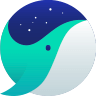
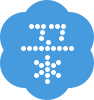

True

In [ ]:
driver.get('https://www.naver.com') # URL Get하기
showscreen(driver) # 스크린샷한 "이미지" 표출
show_html(driver) # HTML
driver.save_screenshot('naver.png') # 현재 디렉토리에 이미지 저장

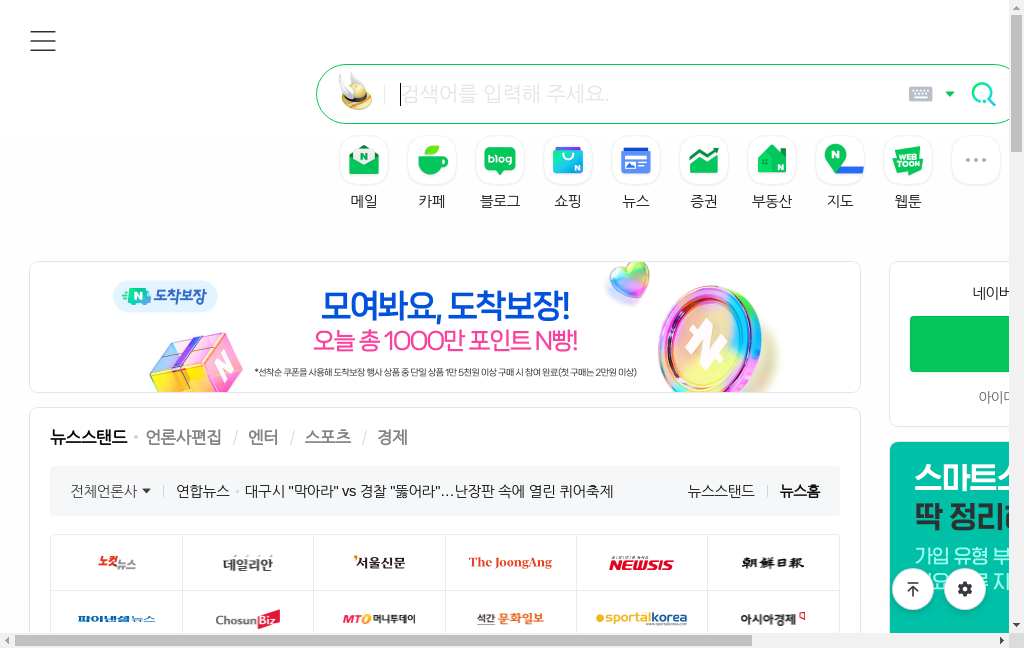

In [ ]:
from PIL import Image

image = Image.open("naver.png") # 이미지 불러오기
image

In [ ]:
####################################################
#### 문제 3. (제한시간: 5분)
#### 네이버 화면에서 class가 "link_partner"인 모든 "텍스트"를
#### result라는 변수명의 리스트 자료구조 안에 저장하세요.
#### 힌트: help() 함수를 잘 활용하여 사용법을 스스로 터득하세요.
####################################################


# **3교시 - YouTube 데이터 수집 (영상, 음성)**

In [ ]:
####################################################
#### 문제 4. (제한시간 15분)
#### https://www.youtube.com/watch?v=Jub_31maG4s 링크의 "최고화질 영상"과 "음악"을
#### 현재 디렉토리와 본인의 구글드라이브에 저장해보세요.
#### 힌트: API 사용이 아닙니다! 한번 열심히 구글링해보세요!
####################################################

In [ ]:
####################################################
#### 문제 5. (제한시간 20분)
#### https://youtu.be/-RwqTKuRX8s 링크의 댓글을
#### 수집해서 results.xlsx에 저장한 뒤 df라는 변수명의
#### Pandas Dataframe에 저장해서 첫 5열만 출력해보세요
#### 조건: API 사용입니다!
####################################################

# **4교시 - 데이터 전처리 (w/ Pandas)**

https://colab.research.google.com/drive/1NVRIfFvGmuxWqpkNyIj97fhprkZ9VV6m#scrollTo=GBrIKb-Gquqx

# **5교시 - 데이터 시각화**

https://colab.research.google.com/drive/1QJYzEyo2g2sCelPnvB6uXNrasl04BqsR